In [2]:
import pandas as pd
import numpy as np
import lightgbm
import os
import warnings

ModuleNotFoundError: No module named 'lightgbm'

    100% |████████████████████████████████| 296kB 5.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/c3/e2/00cacecafbab071c787019f00ad84ca3185952f6bb9bca9550ed83870d4d/pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/09/03/b7b30fa81cb687d1178e085d0f01111ceaea3bf81f9330c937fb6f6c8ca0/matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c8/89/63171228d5ced148f5ced50305c89e8576ffc695a90b58fe5bb602b910c2/scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/2e/dec1cc18c51b8df33c7c4d0a321b0

Failed to build pillow
  Running setup.py install for pillow ... error
    Complete output from command /usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-auvmj4ys/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-iht2wdtp-record/install-record.txt --single-version-externally-managed --compile --user --prefix=:
    running install
    /home/geehwo/.local/lib/python3.6/site-packages/setuptools/command/install.py:37: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
      setuptools.SetuptoolsDeprecationWarning,
    running build
    running build_py
    creating build
    creating build/lib.linux-x86_64-3.6
    creating build/lib.linux-x86_64-3.6/PIL
    copying src/PIL/BdfFontFile.py -> build/lib.linux-x86_64-3.6/PIL
    copying src/PIL/BlpImagePlugin.py -> build/lib.linux-x86_6

Command "/usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-auvmj4ys/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-iht2wdtp-record/install-record.txt --single-version-externally-managed --compile --user --prefix=" failed with error code 1 in /tmp/pip-build-auvmj4ys/pillow/
Note: you may need to restart the kernel to use updated packages.


In [9]:
#데이터셋 불러오기
train = pd.read_csv('data/train.csv')
train.drop('id', inplace = True, axis=1)
test = pd.read_csv('data/test.csv')
test.drop('id', inplace = True, axis=1)
sample_submission = pd.read_csv('data/sample_submission.csv')

In [10]:
#정보 검색
print(f"train : {train.shape}")
print(f"test : {test.shape}")
train.describe()

train : (1253, 9)
test : (2924, 8)


,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')


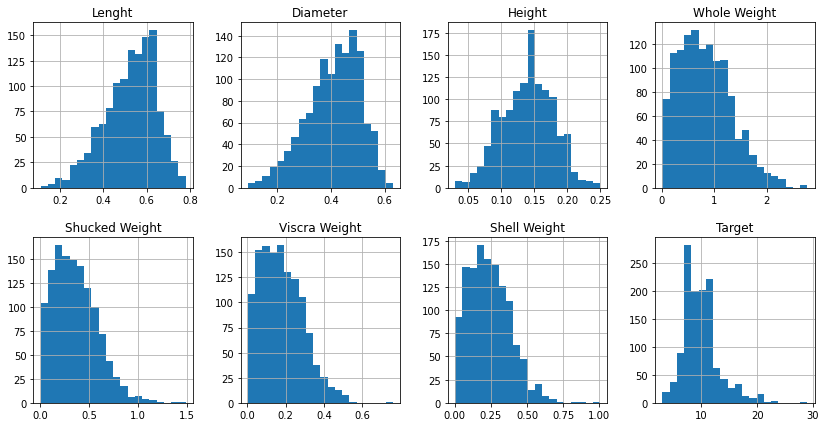

In [11]:
plot_cols_list = train.columns[1:]
print(plot_cols_list)

train[plot_cols_list].hist(figsize=(14,7), grid = True, layout = (2,4), bins = 20)
plt.show()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Lenght,1.000000,0.987293,0.901911,0.926321,0.896337,0.903732,0.895664,0.543789
Diameter,0.987293,1.000000,0.908348,0.927205,0.891183,0.901029,0.904546,0.567933
Height,0.901911,0.908348,1.000000,0.895409,0.837456,0.868192,0.902180,0.604654
Whole Weight,0.926321,0.927205,0.895409,1.000000,0.968007,0.966942,0.951652,0.538404
Shucked Weight,0.896337,0.891183,0.837456,0.968007,1.000000,0.932138,0.870453,0.420126
Viscra Weight,0.903732,0.901029,0.868192,0.966942,0.932138,1.000000,0.905061,0.497283
Shell Weight,0.895664,0.904546,0.902180,0.951652,0.870453,0.905061,1.000000,0.625819
Target,0.543789,0.567933,0.604654,0.538404,0.420126,0.497283,0.625819,1.000000


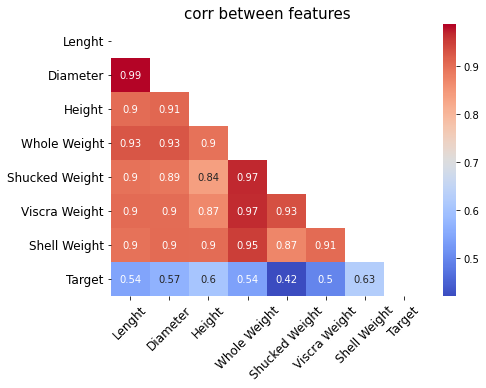

In [12]:
def corr_heat(df):
    plt.figure(figsize=(7,5))

    corr_df = df.corr()
    display(corr_df)

    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = 1
    heat_map = sns.heatmap(corr_df, annot=True, mask = mask, cmap='coolwarm')
    heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
    plt.title('corr between features', fontsize=15)
    plt.show()
    
corr_heat(train[plot_cols_list])

<AxesSubplot:>

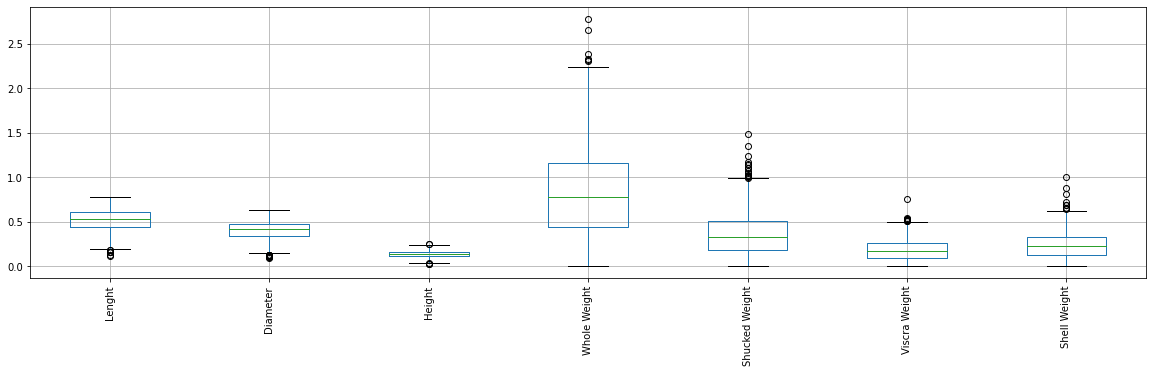

In [14]:
train[plot_cols_list[:-1]].boxplot(rot = 90, figsize=(20,5))

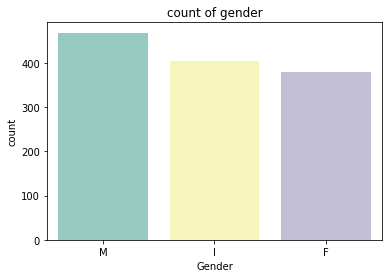

In [15]:
sns.countplot(x = 'Gender', data = train, palette="Set3")
plt.title('count of gender')
plt.show()

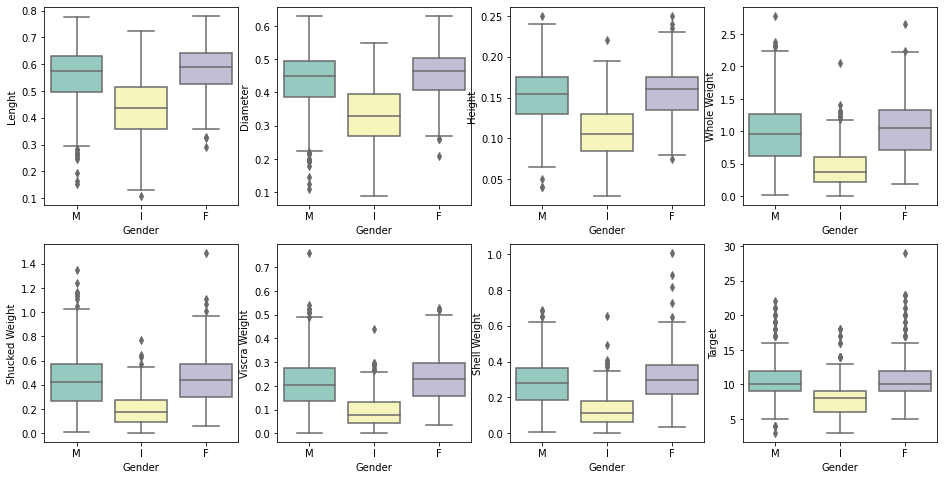

In [16]:
fig = plt.figure(figsize=(16,8))

for i,col in enumerate(plot_cols_list):
    fig.add_subplot(2,4,i+1)
    sns.boxplot(x="Gender", y=col, data=train, palette="Set3")
    # plt.title(f'{col}')

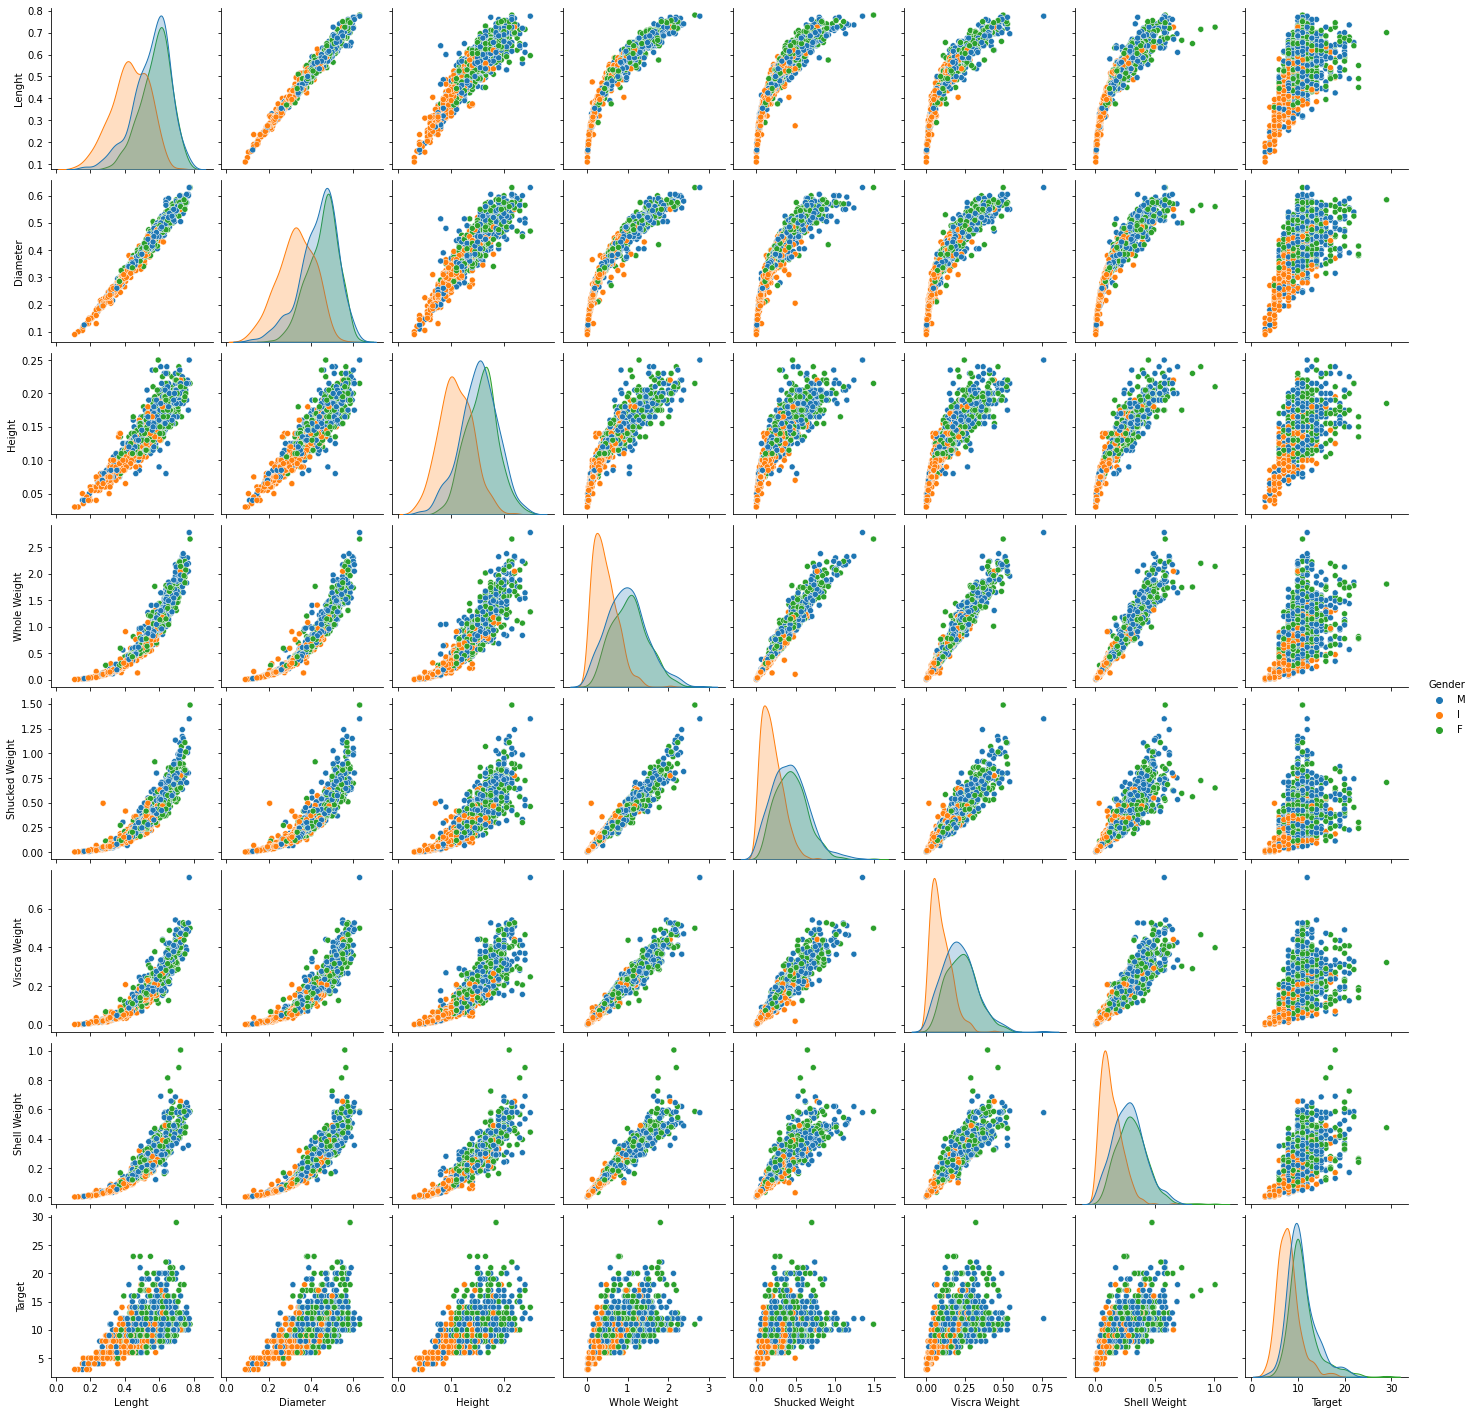

In [17]:
sns.pairplot(train[list(plot_cols_list)+['Gender']], hue="Gender")

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train['Gender'])
gender_encoded_train = encoder.transform(train['Gender'])
gender_encoded_test = encoder.transform(test['Gender'])
train['Gender'] = gender_encoded_train
test['Gender'] = gender_encoded_test

X = train.drop('Target', axis=1)
y = train['Target']

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=722)
skf.split(X, X['Gender'])

pred_list = []
mae_list = []

for fold,(train_index, val_index) in enumerate(skf.split(X,  X['Gender'])):

    print(f'***********{fold+1}th fold start***********')
    x_train, x_val, y_train, y_val = X.loc[train_index], X.loc[val_index], y.loc[train_index], y.loc[val_index]

    lgb = lightgbm.LGBMRegressor(boosting_type='gbdt',
        n_estimators=1000, random_state=722, learning_rate=0.05, categorical_feature=[0])

    lgb.fit(x_train, y_train,
            eval_set=(x_val,y_val),
            eval_metric='l1', verbose=False, early_stopping_rounds=100)

    pred = lgb.predict(x_val)
    result = mean_absolute_error(pred,y_val)
    mae_list.append(result)
    
    pred_test = lgb.predict(test)
    pred_list.append(pred_test)
    
    print(f'mae : {result:.4f}', end='\n\n')
    
print(f'mean mae {np.mean(mae_list):.4f}')

***********1th fold start***********
mae : 1.5864

***********2th fold start***********
mae : 1.5426

***********3th fold start***********


C:\ProgramData\Anaconda3\envs\bigdata0809\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\bigdata0809\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\bigdata0809\lib\site-packages\lightgbm\basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter

mae : 1.4702

***********4th fold start***********
mae : 1.4828

***********5th fold start***********
mae : 1.8582

mean mae 1.5880


C:\ProgramData\Anaconda3\envs\bigdata0809\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\bigdata0809\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\bigdata0809\lib\site-packages\lightgbm\basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter